# Get full time series data for:

entire Niskin data set /Nuts/Temp

measures of mixing:
- MLD2015 (own reanalysis of time series data)
- MLD2019 (own reanalysis of time series data)
- X21°C (own reanalysis of time series data)

measures of productivity: 
- Tchla HPLC
- Tchla fluoresence
- POC
- ...?


## 1. niskin data set DMO - read!

In [2]:
#install.packages("ncdf4")

In [1]:
require(ncdf4, warn.conflicts = FALSE);
require(ggplot2, warn.conflicts = FALSE);
require(cowplot, warn.conflicts = FALSE);

Loading required package: ncdf4

Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [5]:
# open a NetCDF file
niskdat <- nc_open("Data/niskin.netcdf")

#print(niskdat)

# Read entire ncdf file to r DataFrame

In [6]:
niskdat_df <- data.frame("Num" = 1:niskdat$dim$unlimited$len)
print('start')
for(i in 1:niskdat$nvars){
    #print(i)
    niskdat_df[paste(attributes(niskdat$var)$names[i])] <- ncvar_get(niskdat, attributes(niskdat$var)$names[i])
}
print('done reading')
head(niskdat_df)

[1] "start"
[1] "done reading"


Num,Cruise_number,Cruise_ID_1,Cruise_ID_2,Leg,Day,Month,Year,Latitude,Longitude,...,Bact_Biomass_uMC,Bio_cast_no,ISO_DateTime_start_hc_local,ISO_DateTime_end_hc_local,ISO_DateTime_start_bc_local,ISO_DateTime_end_bc_local,ISO_DateTime_start_hc_UTC,ISO_DateTime_end_hc_UTC,ISO_DateTime_start_bc_UTC,ISO_DateTime_end_bc_UTC
1,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
2,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
3,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
4,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
5,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
6,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00


## get temp & nuts over depth

In [9]:
cat(names(niskdat_df))

Num Cruise_number Cruise_ID_1 Cruise_ID_2 Leg Day Month Year Latitude Longitude Hydro_cast_no Depth_target Depth_real O2_ml_L q_O2_ml_L O2_umol_kg q_O2_umol_kg NO3_UDO q_NO3_UDO PO4_UDO q_PO4_UDO SiO4_UDO q_SiO4_UDO NH4_USF q_NH4_USF NO2_USF q_NO2_USF NO3_NO2_USF q_NO3_NO3_USF PO4_USF q_PO4_USF SiO4_USF q_SiO4_USF pH q_pH Alkalinity_mol_kg q_Alkalinity_mol_kg Alkalinity_umol_kg q_Alkalinity_umol_kg TCO2 q_TCO2 fCO2 q_fCO2 pH_corrected q_pH_corrected TCO2_corrected q_TCO2_corrected fCO2_corrected q_fCO2_corrected Salinity_bottles q_Salinity_bottles Salinity_CTD q_Salinity_CTD Temperature q_Temperature Sigma_t q_Sigma_t TPP q_TPP PIP q_PIP POC_ug_kg q_POC_ug_kg PON_ug_kg q_PON_ug_kg POC_ug_L q_POC_ug_L PN_ug_L q_PN_ug_L C_N_particulate q_C_N_particulate DON q_DON DOP q_DOP DOC q_DOC TOC q_TOC PrimaryProductivity q_PrimaryProductivity Chlorophyll q_Chlorophyll Phaeopigments q_Phaeopigments Total_Prokaryotes Bact_Biomass_mgC_m3 Bact_Biomass_uMC Bio_cast_no ISO_DateTime_start_hc_local ISO_D

In [11]:
niskdat_df$Depth_real <- as.numeric(niskdat_df$Depth_real)

niskdat_df$Temperature <- as.numeric(niskdat_df$Temperature)

niskdat_df$NO3_NO2_USF <- as.numeric(niskdat_df$NO3_NO2_USF)

In [12]:
TempNuts <- data.frame(Depth_real = niskdat_df$Depth_real, Temperature = niskdat_df$Temperature, NO3_NO2_USF = niskdat_df$NO3_NO2_USF)

In [30]:
TempNutsAbove250 <- TempNuts[TempNuts$Depth_real<180,]

Warning message:
“Removed 612 rows containing missing values (geom_point).”


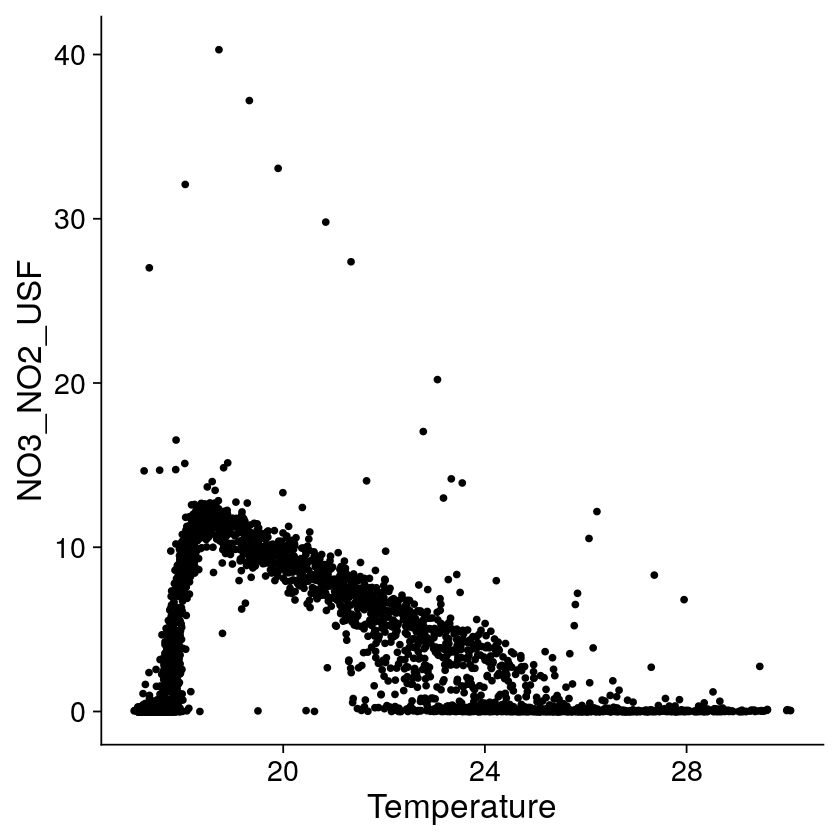

In [31]:
ggplot(data=TempNuts, aes(x=Temperature,y=NO3_NO2_USF)) + geom_point() + theme_cowplot(20)

Warning message:
“Removed 311 rows containing missing values (geom_point).”


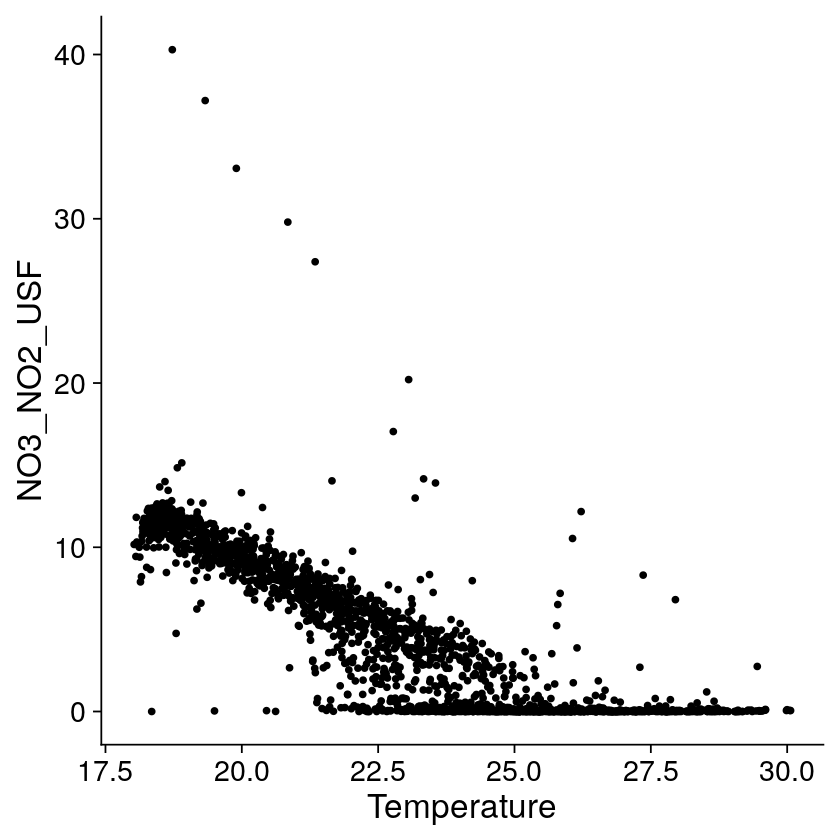

In [32]:
ggplot(data=TempNutsAbove250, aes(x=Temperature,y=NO3_NO2_USF)) + geom_point() + theme_cowplot(20)

In [24]:
#ggsave('Cariaco.pdf')

Saving 6.67 x 6.67 in image

Warning message:
“Removed 612 rows containing missing values (geom_point).”


## CREATE THESE SAME PLOTS for other nutrients!